In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift, ifftshift, ifft2
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline
pi = np.pi

# Discrete time signal vs Digital signal vs Analog signal
- **Analog signal** -> $x(t_1, t_2)$, $t_1$ and $t_1$ are continious, $x(t1, t2)$ is continious
- **Discrete time signal** -> $x[n, m]$, $n$ and $m$ are discrete, $x[n, m]$ is continious
- **Digital signal** -> $x[n, m]$, $n$ and $m$ are discrete, $x[n, m]$ is discrete

For discrete 2d signal, <span style="color:red">$n = 0,~1,~2,~\cdots,~(N-1)$</span> and <span style="color:red">$m = 0,~1,~2,~\cdots,~(M-1)$</span> where $N = x.\mathrm{shape[0]}$ and $M = x.\mathrm{shape[1]}$

# Example of 2D periodic discrete time signal - sinusoids (sin, cos)

In [21]:
n_cycle_1 = 3
n_cycle_2 = 0

N = 100 # height or row
M = 100 # width or column

f1 = n_cycle_1/N
f2 = n_cycle_2/M
# n array and m array (matrix) to identify 
n, m = np.meshgrid(np.arange(N), np.arange(M))

In [4]:
# N = M = 10
# n = np.arange(N)
# m = np.arange(M)
# print(n)
# print(m)

# n_mat, m_mat = np.meshgrid(n, m)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [6]:
n_mat

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [7]:
m_mat

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

In [22]:
x = np.cos(2*pi*f1*n + 2*pi*f2*m) # adding 

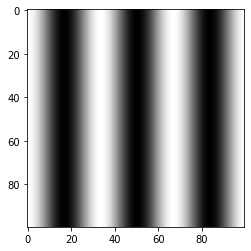

In [23]:
%matplotlib inline
plt.figure()
plt.imshow(x, cmap="gray")

In [15]:
%matplotlib notebook

<ipython-input-24-5b82afb09c58>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


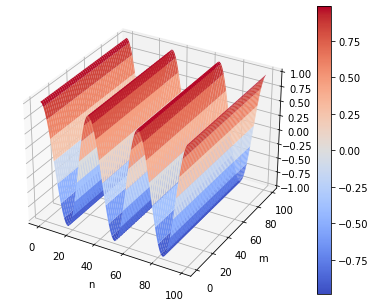

In [24]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(n, m, x, cmap=cm.coolwarm)
ax.set_xlabel("n")
ax.set_ylabel("m")
fig.colorbar(surf)
plt.show()

In [25]:
from numpy.fft import fft, fft2, fftshift, fftfreq
# Compute DFT
X = fft2(x)

# Center the magnitude response to (M/2, N/2) & nomrmalize
X_centered = fftshift(X)
# F_sinusoid_centered = F_sinusoid_centered/np.max(F_si

u = fftshift(fftfreq(N))
v = fftshift(fftfreq(M))

u, v = np.meshgrid(u, v)

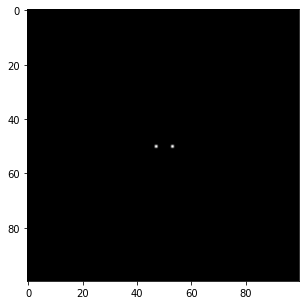

In [26]:
%matplotlib inline
plt.figure(figsize=(5,5))
plt.imshow(np.log(1+np.abs(X_centered)), cmap="gray")

<ipython-input-49-80f6f1796f79>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


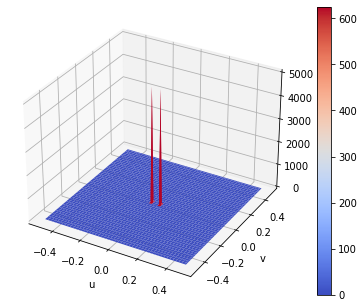

In [49]:
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(u, v, np.abs(X_centered), cmap=cm.coolwarm)
ax.set_xlabel("u")
ax.set_ylabel("v")
fig.colorbar(surf)
plt.show()

# Frequency along x and y

In [28]:
n_cycle_1 = 3
n_cycle_2 = 5

N = 100
M = 100

f1 = n_cycle_1/N
f2 = n_cycle_2/M

n, m = np.meshgrid(np.arange(N), np.arange(M))

x = np.cos(2*pi*f1*n + 2*pi*f2*m)

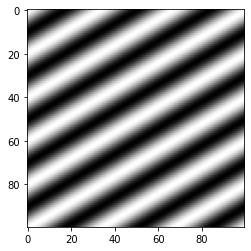

In [30]:
%matplotlib inline
plt.figure()
plt.imshow(x, cmap="gray")

In [31]:
def perform_fft2(x, N, M):
    X = fft2(x)
    X = fftshift(X)
    
   
    u = fftshift(fftfreq(N))
    v = fftshift(fftfreq(M))

    u, v = np.meshgrid(u, v)

    return X, u, v

In [32]:
X, u, v = perform_fft2(x, N, M)

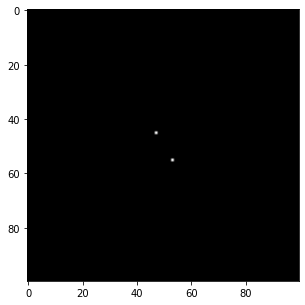

In [33]:
#%matplotlib inline
plt.figure(figsize=(5,5))
plt.imshow(np.abs(X), cmap="gray")

In [34]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(u, v, np.abs(X), cmap=cm.coolwarm)
ax.set_xlabel("u")
ax.set_ylabel("v")
fig.colorbar(surf)
plt.show()


<IPython.core.display.Javascript object>

<ipython-input-34-4a495680ffaf>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<IPython.core.display.Javascript object>

# FFT of a rectangular funciton

In [35]:
N = 100
M = 100

n, m = np.meshgrid(np.arange(N), np.arange(M))

x = np.zeros_like(n)

center_n = N//2
center_m = M//2

width_n = 50
width_m = 50

# centered rectangle
x[(abs(n - center_n)<= width_n//2) & (abs(m - center_m)<= width_m//2)] = 1



In [36]:
def plot_gray_image(img,figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()


def plot_surface(x, y, f):
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(x, y, f, cmap=cm.coolwarm)
    fig.colorbar(surf)
    plt.show()
    

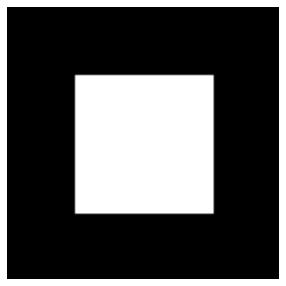

In [37]:
%matplotlib inline
plot_gray_image(x)

In [38]:
%matplotlib notebook
plot_surface(n, m, x)

<IPython.core.display.Javascript object>

<ipython-input-36-b7b5e4c2b72f>:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<IPython.core.display.Javascript object>

In [39]:
X, u, v = perform_fft2(x, N, M)

In [40]:
%matplotlib notebook
plot_surface(u, v, np.abs(X))

<IPython.core.display.Javascript object>

<ipython-input-36-b7b5e4c2b72f>:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<IPython.core.display.Javascript object>

In [41]:
from ipywidgets import interact, interact_manual
%matplotlib inline
@interact
def plot_rect(width=(10, 70, 10)):
    N = 100
    M = 100

    n, m = np.meshgrid(np.arange(N), np.arange(M))

    x = np.zeros_like(n)

    center_n = N//2
    center_m = M//2

#     width_n = width
#     width_m = width

    # centered rectangle
    x[(abs(n - center_n)<= width//2) & (abs(m - center_m)<= width//2)] = 1
    
    X, u, v = perform_fft2(x, N, M)
    plot_surface(u, v, (np.abs(X)))

interactive(children=(IntSlider(value=40, description='width', max=70, min=10, step=10), Output()), _dom_class…

# Reconstruction

In [42]:
def perform_ifft(X, N, M):
    X_ishift = ifftshift(X)
    x_recon = ifft2(X_ishift)
    x_recon = np.real(x_recon)
    
    n, m = np.meshgrid(np.arange(N), np.arange(M))
    
    
    x_recon = x_recon[:N, :M]
    
    return x_recon, n, m

In [43]:
x_recon, n, m = perform_ifft(X, 100, 100)

<ipython-input-36-b7b5e4c2b72f>:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


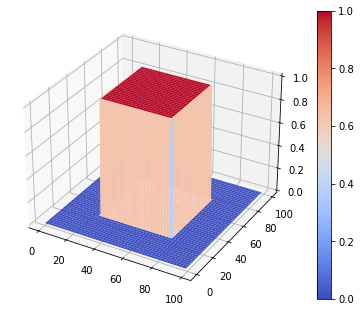

In [44]:
plot_surface(n, m, x_recon)

In [45]:
from skimage.color import rgb2gray
from skimage.io import imread

image = rgb2gray(imread("kayak.jpg"))

from skimage.transform import resize
M = 256
N = 256
image = resize(image, (M, N))

plot_gray_image(image)

FileNotFoundError: ignored

In [46]:
X, u, v = perform_fft2(image, N, M)

NameError: ignored

<ipython-input-36-b7b5e4c2b72f>:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


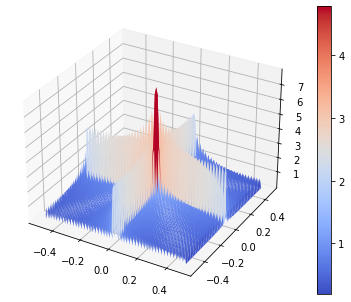

In [47]:
plot_surface(u, v, np.log(1+np.abs(X)))